# Boston Housing

## Importación de Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from scipy import stats
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('dark_background')

## Carga de la data


In [2]:
df = pd.read_csv('./data/housePrices.csv')
df.head(5)

,Cluster,crime,zone,indus,chas,noxsq,room,age,dist,rad,tax,ptrat,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 15)

In [4]:
df.describe().round(decimals=3) 

,Cluster,crime,zone,indus,chas,noxsq,room,age,dist,rad,tax,ptrat,black,lstat,medv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,48.530,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.696,9.549,408.237,18.456,356.674,12.653,22.533
std,27.569,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.000,8.707,168.537,2.165,91.295,7.141,9.197
min,1.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,0.586,1.000,187.000,12.600,0.320,1.730,5.000
25%,27.250,0.082,0.000,5.190,0.000,0.449,5.885,45.025,2.074,4.000,279.000,17.400,375.378,6.950,17.025
50%,43.000,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.107,5.000,330.000,19.050,391.440,11.360,21.200
75%,79.000,3.677,12.500,18.100,0.000,0.624,6.624,94.075,5.113,24.000,666.000,20.200,396.225,16.955,25.000
max,92.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,9.223,24.000,711.000,22.000,396.900,37.970,50.000


In [65]:
Y = df['medv']
X = df[['Cluster', 'crime', 'zone', 'indus', 'chas', 'noxsq', 'room', 'age', 'dist', 'rad', 'tax', 'ptrat', 'black', 'lstat']]


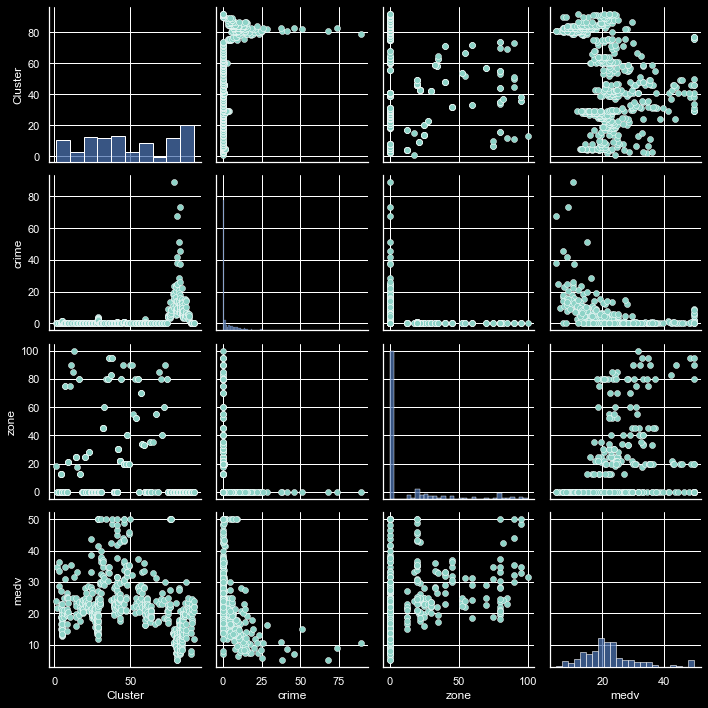

In [6]:
sns.pairplot(df[['Cluster', 'crime', 'zone','medv']], height=2.5)
plt.tight_layout()

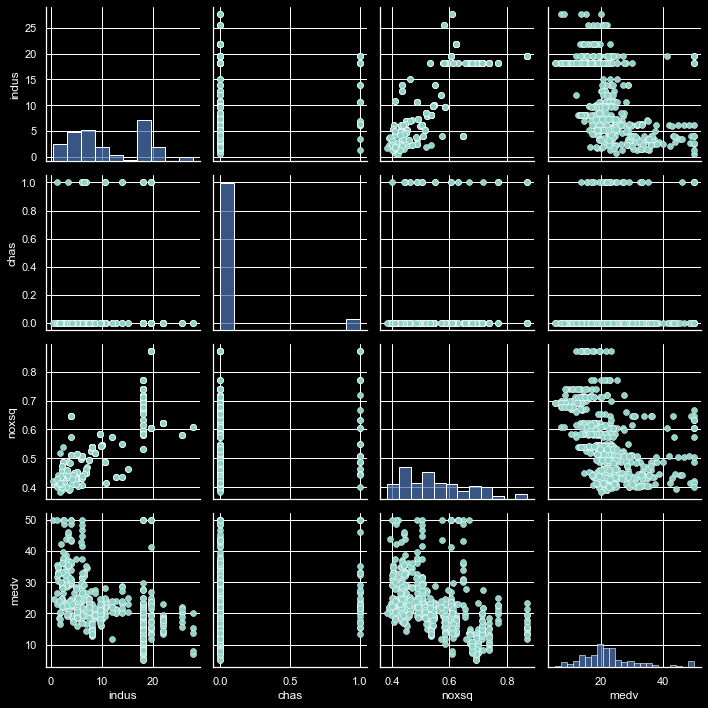

In [7]:
sns.pairplot(df[['indus', 'chas', 'noxsq','medv']], height=2.5)
plt.tight_layout()

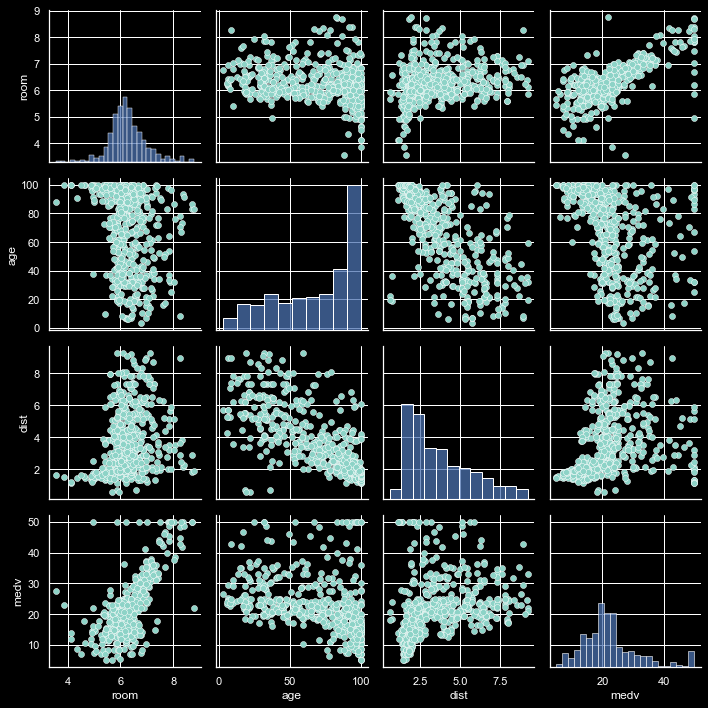

In [8]:
sns.pairplot(df[['room', 'age', 'dist','medv']], height=2.5)
plt.tight_layout()

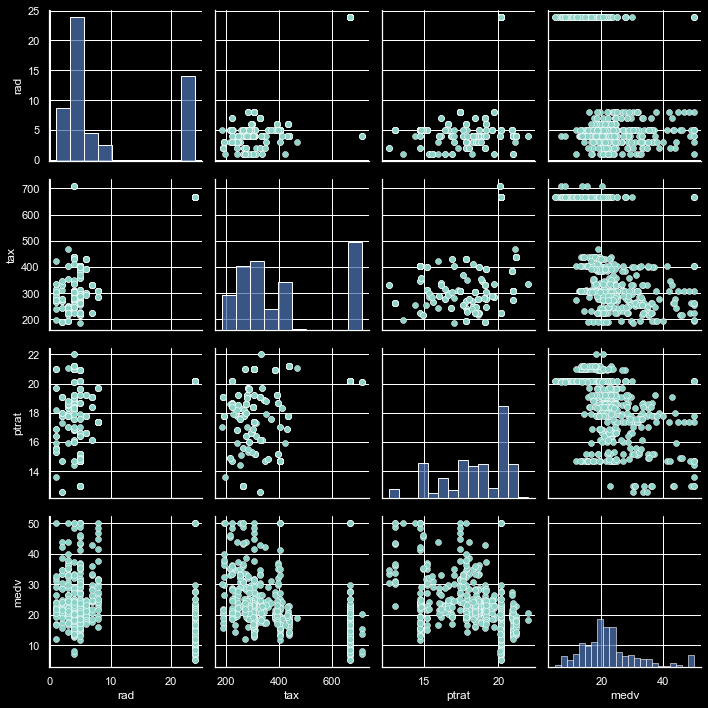

In [9]:
sns.pairplot(df[['rad', 'tax', 'ptrat','medv']], height=2.5)
plt.tight_layout()

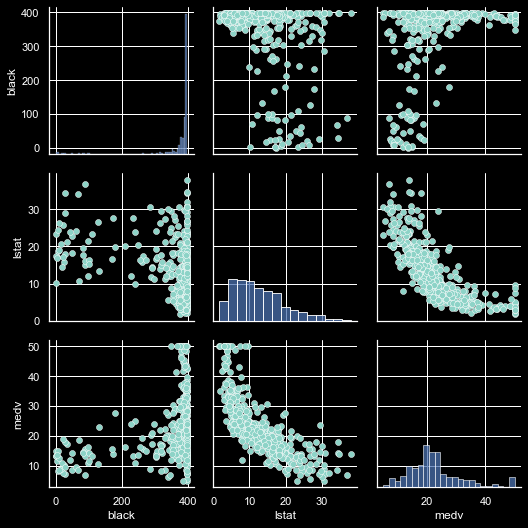

In [10]:
sns.pairplot(df[['black', 'lstat','medv']], height=2.5)
plt.tight_layout()

In [12]:
df.shape

(506, 15)

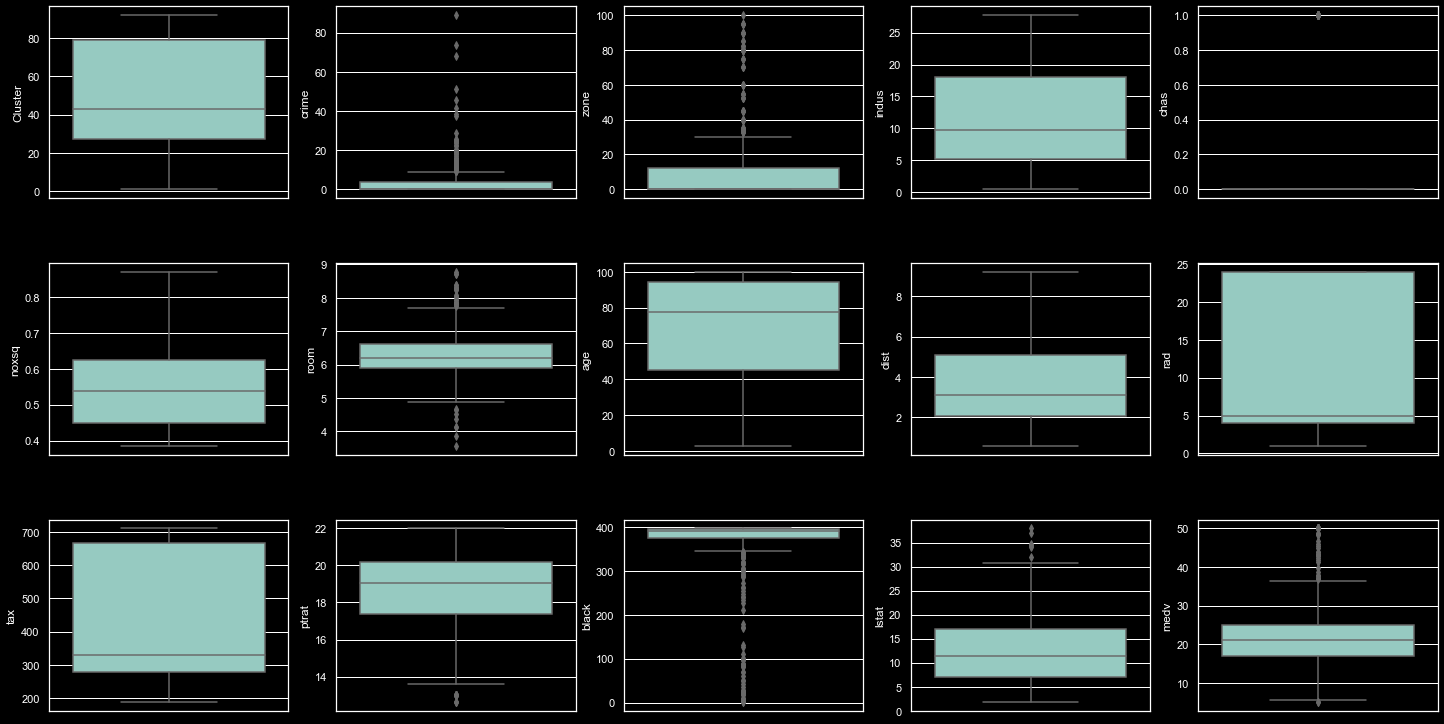

In [13]:
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [14]:
    for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print(" %s de datos anómalos = %.2f%%" % (k, perc))

Column Cluster outliers = 0.00%
Column crime outliers = 13.04%
Column zone outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column noxsq outliers = 0.00%
Column room outliers = 5.93%
Column age outliers = 0.00%
Column dist outliers = 0.00%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptrat outliers = 2.96%
Column black outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


## Datos Raw

<AxesSubplot:>

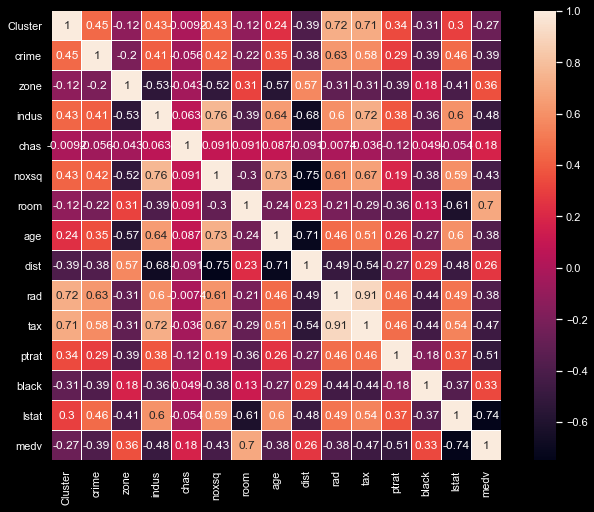

In [25]:

corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, linewidths=.5,cbar=True,annot=True, square=True,yticklabels=corr.columns)

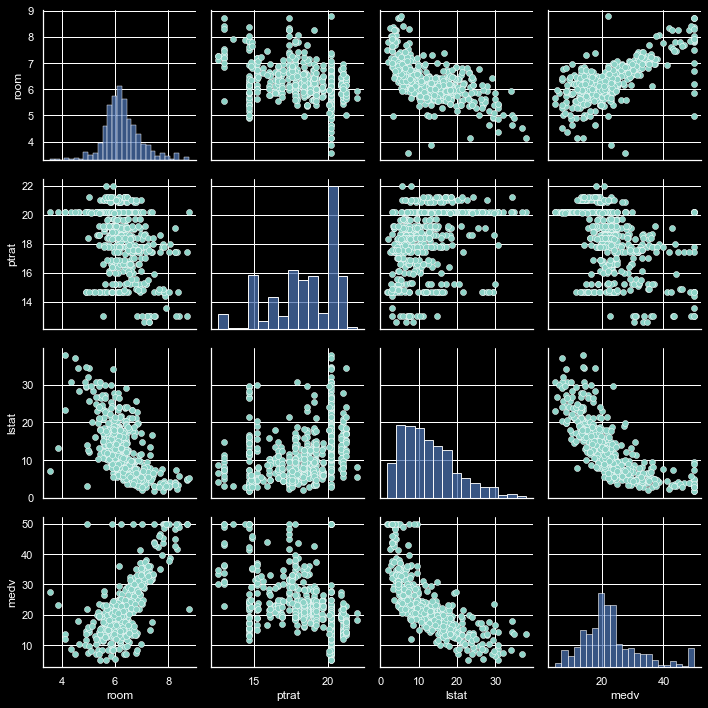

In [39]:
sns.pairplot(df[['room', 'ptrat','lstat','medv']], height=2.5)
plt.tight_layout()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [67]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.6911750027968736

In [68]:
model.coef_.round(2)

array([-3.000e-02, -1.300e-01,  2.000e-02,  7.000e-02,  3.130e+00,
       -1.476e+01,  4.360e+00, -1.000e-02, -1.200e+00,  2.900e-01,
       -1.000e-02, -9.800e-01,  1.000e-02, -5.400e-01])

## Datos Clean

In [56]:
df_clean = df.copy()
for i in df.columns:
  df.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(df[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  mean = df_clean[i].mean()
  if i != 'medv':
    df_clean.loc[df_clean[i] < lower_bound, [i]] = mean
    df_clean.loc[df_clean[i] > upper_bound, [i]] = mean
  else:
    df_clean.loc[df_clean[i] < lower_bound, [i]] = mean
    df_clean.loc[df_clean[i] > upper_bound, [i]] = mean

<AxesSubplot:>

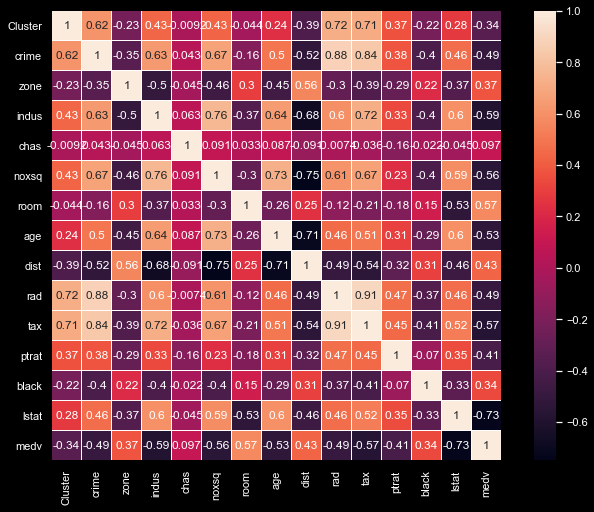

In [57]:
corr = df_clean.corr()
sns.heatmap(corr, xticklabels=corr.columns, linewidths=.5,cbar=True,annot=True, square=True,yticklabels=corr.columns)

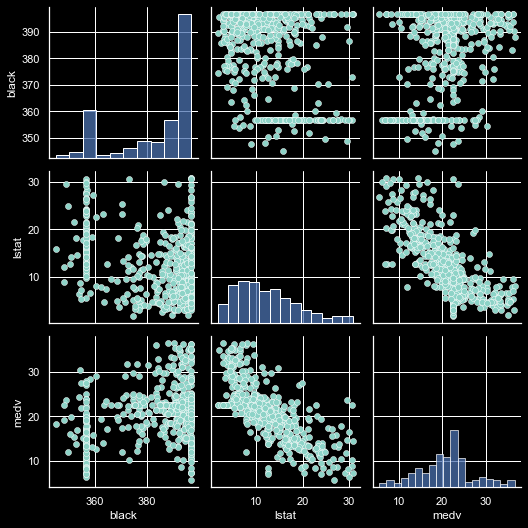

In [58]:
sns.pairplot(df_clean[['black', 'lstat','medv']], height=2.5)
plt.tight_layout()

In [62]:
Y = df_clean['medv']
X = df_clean[['Cluster', 'crime', 'zone', 'indus', 'chas', 'noxsq', 'room', 'age', 'dist', 'rad', 'tax', 'ptrat', 'black', 'lstat']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)





0.6149246119214238

In [63]:
model.coef_.round(2)

array([-1.000e-02, -8.000e-02,  2.000e-02, -4.000e-02,  1.341e+01,
       -1.300e-01,  3.310e+00, -3.000e-02, -3.200e-01,  2.000e-02,
       -1.000e-02, -3.100e-01,  2.000e-02, -3.700e-01])

In [64]:
model.coef_.round(1)

array([-0. , -0.1,  0. , -0. , 13.4, -0.1,  3.3, -0. , -0.3,  0. , -0. ,
       -0.3,  0. , -0.4])

In [38]:
Y = df_clean['medv']
X = df_clean[['lstat']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.4227259217124185